In [2]:
# 데이터 구성 패키지 DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 시각화, subpackage pyplot
import matplotlib
import matplotlib.pyplot as plt

# 통계적 시각화 추세 패키지
import seaborn as sns

# 통계 분석 패키지
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest # 비율 검정

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [3]:
df_raw = pd.read_csv('/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_PROCESS_NULL_COL_OUT.csv', engine='python', encoding='EUC-KR')
df_raw.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,82.8,84.0,443,419,392,372,4115.0,3973.0,4432,2506.0
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,80.3,81.8,445,423,395,374,3642.0,4097.0,4499,2573.0
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,81.2,82.2,444,421,393,372,4063.0,3972.0,4460,2502.0
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,83.0,84.0,444,420,393,372,4131.0,4011.0,4466,2522.0
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,80.1,82.0,443,420,392,372,3632.0,4073.0,4482,2584.0


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

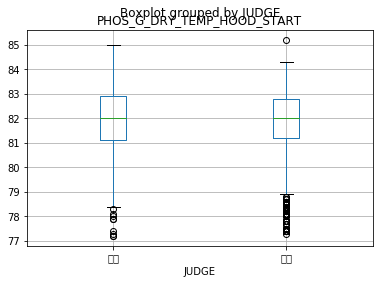

In [4]:

df_raw.boxplot('PHOS_G_DRY_TEMP_HOOD_START', by='JUDGE')

In [5]:
lm = ols('PHOS_G_DRY_TEMP_HOOD_START~C(JUDGE)', df_raw).fit()
print(anova_lm(lm))

              df       sum_sq   mean_sq         F    PR(>F)
C(JUDGE)     1.0     0.107361  0.107361  0.057356  0.810738
Residual  3980.0  7449.917755  1.871839       NaN       NaN


In [ ]:
# p값 유의하지 않다. 